In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('events.csv', parse_dates=['timestamp'])

In [3]:
# 2) Mapeia cada nó a uma posição vertical
raw_nodes = set(df['source'].tolist() + df['destination'].tolist())
# Filtra apenas valores inteiros (ignorando 'all' e outros não inteiros)
nodes = [int(n) for n in raw_nodes if str(n).isdigit()]
y_map = {nid: idx for idx, nid in enumerate(sorted(nodes, reverse=True))}

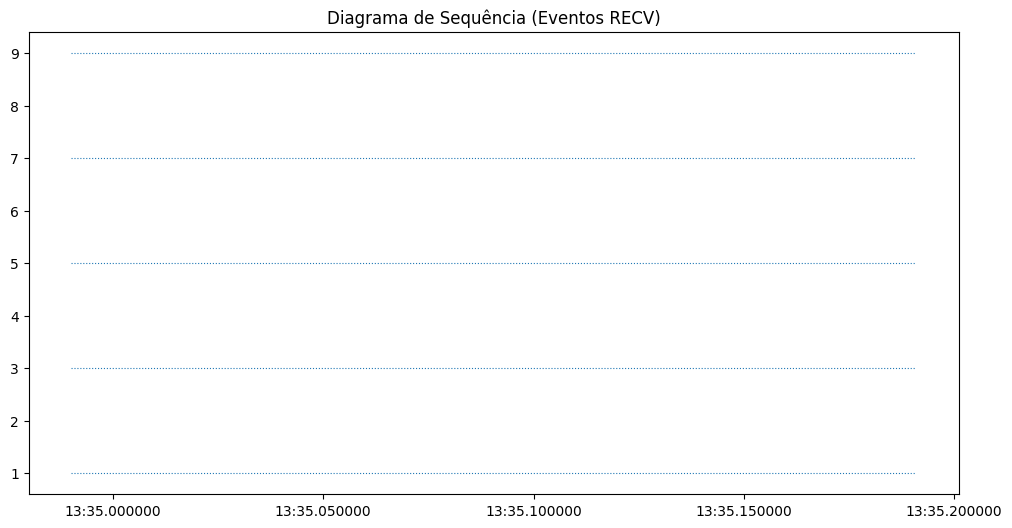

In [4]:
# --- Diagrama de Sequência ---
plt.figure(figsize=(12, 6))
plt.title('Diagrama de Sequência (Eventos RECV)')
# Linhas de vida
tmin, tmax = df['timestamp'].min(), df['timestamp'].max()
for nid, y in y_map.items():
    plt.hlines(y, tmin, tmax, linestyles='dotted', linewidth=0.8)


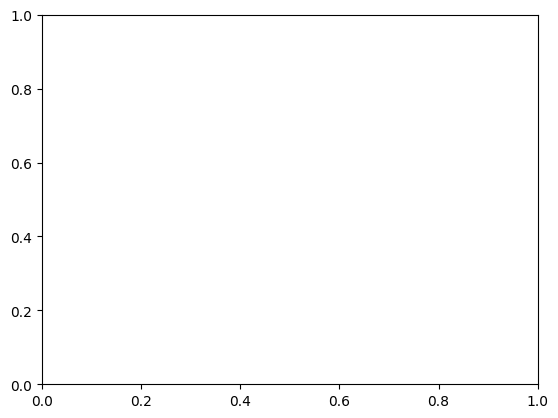

In [5]:
df_recv = df[df['action'] == 'RECV']
for _, row in df_recv.iterrows():
    src = int(row['source'])
    dst = int(row['destination'])
    t = row['timestamp']
    plt.annotate(
        '',
        xy=(t, y_map[dst]),
        xytext=(t, y_map[src]),
        arrowprops=dict(arrowstyle='->', linewidth=0.5)
    )

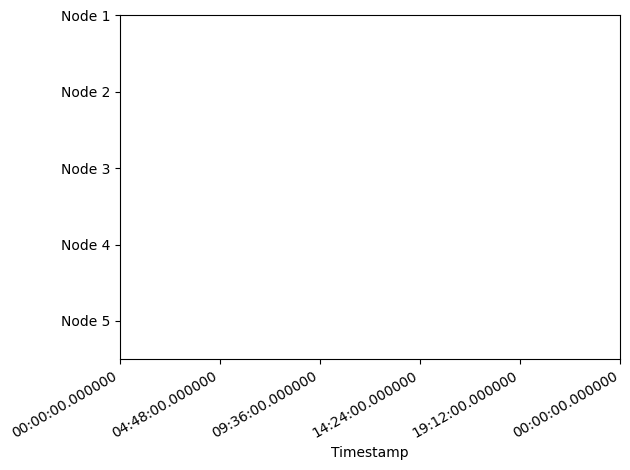

In [6]:
plt.yticks(list(y_map.values()), [f'Node {nid}' for nid in sorted(y_map.keys(), reverse=True)])
plt.xlabel('Timestamp')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Contagem de Mensagens por Tipo ao Longo do Tempo')

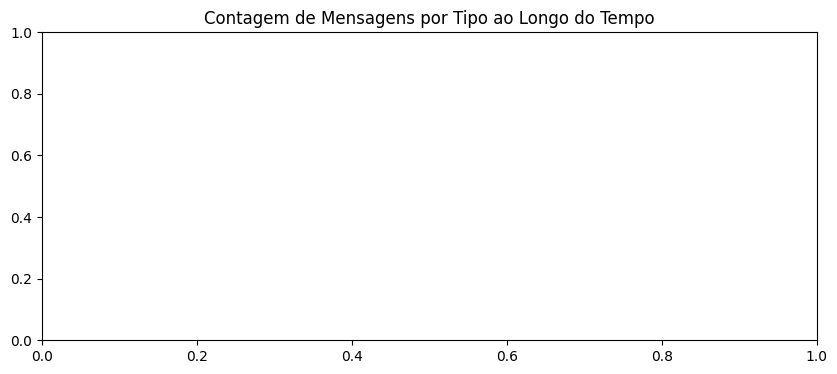

In [7]:
# --- Dashboard: Histograma de Mensagens por Tipo ---
plt.figure(figsize=(10, 4))
plt.title('Contagem de Mensagens por Tipo ao Longo do Tempo')


In [9]:

# Cria uma coluna de janela de tempo (ex: janelas de 1 segundo)
df['time_sec'] = df['timestamp'].dt.floor('s')
counts = df.groupby(['time_sec', 'action']).size().unstack(fill_value=0)


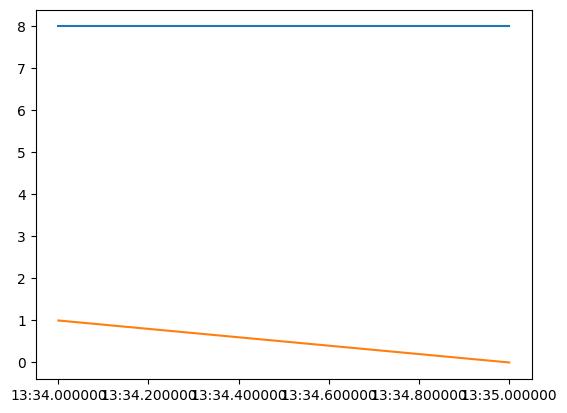

In [10]:
# Plota cada tipo em linha
for action in counts.columns:
    plt.plot(counts.index, counts[action], label=action)


/tmp/ipykernel_20504/564416339.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


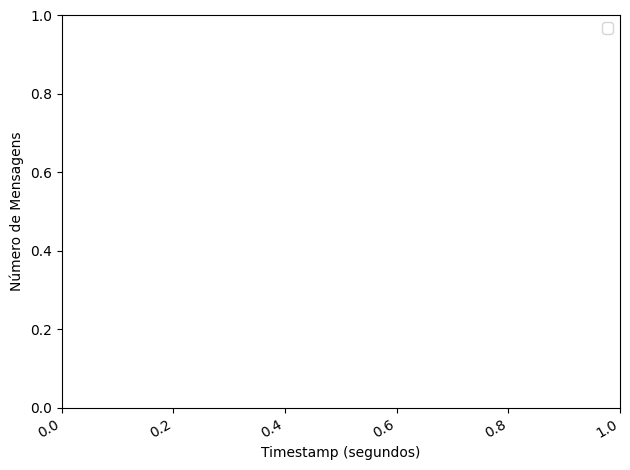

In [11]:
plt.xlabel('Timestamp (segundos)')
plt.ylabel('Número de Mensagens')
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()
